## Problem Set 4
### MACS 30200
### Leoson Hoay

**Importing necessary packages**:

In [1]:
import numpy as np
import scipy.stats as sts
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### Problem 1

**(a)**

In [2]:
r = 0.85
mu = 11.4
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [3]:
z = np.zeros(500)

In [4]:
for i in range(500):
    if i == 0:
        z[i] = r*mu + (1-r)*mu + eps_vec[i]
    else:
        z[i] = r*z[i-1] + (1-r)*mu + eps_vec[i]

In [5]:
z

array([12.18888469, 12.2159573 , 11.68315782, 11.01553877, 10.91590679,
       10.1567745 , 10.68040553, 10.67842452, 10.88565201, 10.72508687,
       10.65326395,  9.91791397, 10.04701032, 10.40104919,  9.86045939,
       10.12776085, 10.00300618, 10.57799829, 10.46230611, 11.28872644,
       11.27266911, 11.3207326 , 11.12438321, 13.13436557, 12.89920999,
       12.77832705, 11.29822341, 11.72133346, 11.53360466, 11.40244288,
       10.99761888, 11.95615748, 12.17992382, 11.98569528, 11.51007151,
       11.53889543, 11.62239461, 12.05084072, 12.61656985, 13.08475995,
       11.83484479, 12.02965801, 11.58664022, 11.60122697, 12.78131856,
       13.40791974, 12.73042248, 12.55257799, 11.43553918, 11.68434424,
       10.86117739, 11.45112658, 10.44432582, 10.28175407, 10.77658964,
       10.88626827, 11.24280425, 11.44757108, 11.84646005, 11.62959357,
       11.41153827, 12.06439749, 12.35733626, 11.30835897, 12.0244509 ,
       11.82656181, 11.53766332, 12.47163416, 12.39492366, 11.77

<IPython.core.display.Javascript object>


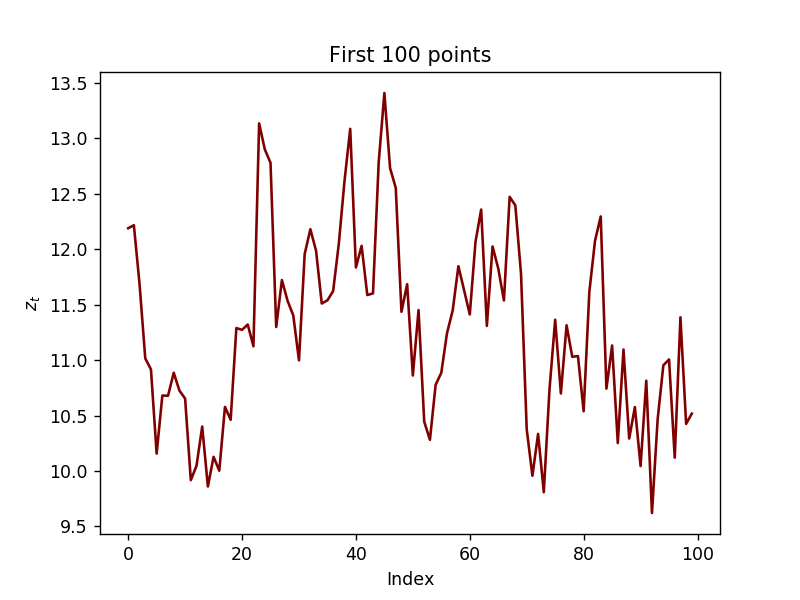

In [6]:
%matplotlib notebook
plt.plot(z[:100], color = "maroon")
plt.title("First 100 points")
plt.xlabel("Index")
plt.ylabel("$z_t$")
plt.show()

**(b)**

In [7]:
z_vals = np.linspace(mu-3*sigma, mu+3*sigma, 5)

In [8]:
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

**(c)**

In [9]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

In [10]:
transition_mat = np.zeros(shape=(5,5))

In [11]:
z_indices = np.digitize(z,z_cuts)

In [12]:
for j in range(499):
    transition_mat[z_indices[j]][z_indices[j+1]] += 1

In [13]:
transition_mat = transition_mat/transition_mat.sum(axis = 1, keepdims=True)
transition_mat

array([[0.69387755, 0.26530612, 0.04081633, 0.        , 0.        ],
       [0.09166667, 0.55      , 0.325     , 0.03333333, 0.        ],
       [0.03067485, 0.2208589 , 0.48466258, 0.22699387, 0.03680982],
       [0.        , 0.04201681, 0.34453782, 0.50420168, 0.1092437 ],
       [0.        , 0.        , 0.04166667, 0.35416667, 0.60416667]])

**(d)**

In [14]:
initial_vec =  np.array([[0], [0],[1],[0],[0]])

In [15]:
transition_mat_cubed = LA.matrix_power(transition_mat.T,3) 

In [16]:
transition_mat_cubed @ initial_vec

array([[0.07359174],
       [0.24627604],
       [0.35727165],
       [0.24264386],
       [0.08021671]])

The probability is approximately 0.0802.

**(e)**

In [27]:
eigvals, eigvecmat = LA.eig(transition_mat.T)
# to obtain correct values (acknowledgements to Sasha)
eigvals = np.around(eigvals, decimals=2)
one_ind = np.argwhere(eigvals == 1).flatten()
eigvec = eigvecmat[:, one_ind] / eigvecmat[:, one_ind].sum()
stat_dist = eigvec

In [28]:
print(stat_dist)

[[0.10535858]
 [0.24318563]
 [0.32471588]
 [0.23240379]
 [0.09433612]]


The above represents the long run ergodic distribution of $z_t$.

**(f)**

In [29]:
z0 = z_vals[2]
x_vec = np.zeros(T)
x_t = z0
xt_ind = 1
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(transition_mat[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    x_t = x_tp1
    xt_ind = xtp1_ind

<IPython.core.display.Javascript object>


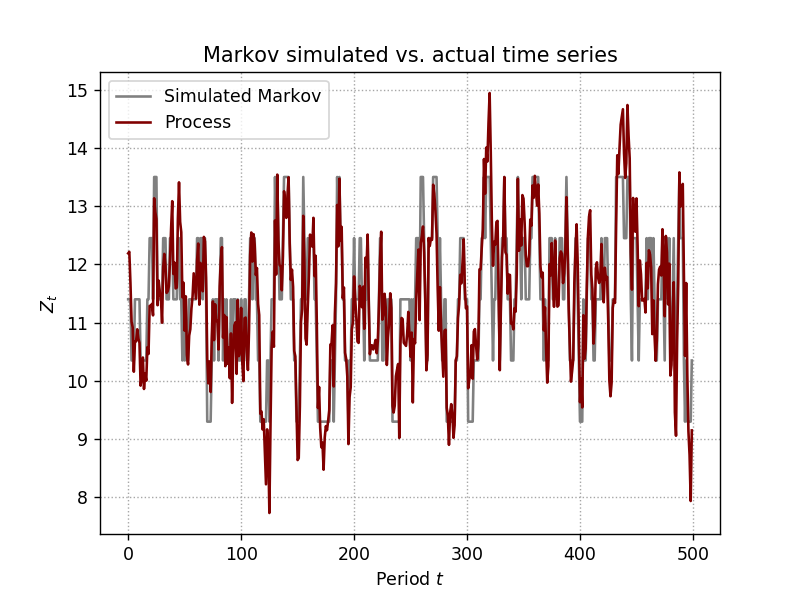

In [30]:
%matplotlib notebook
plt.plot(x_vec, color = "grey")
plt.plot(z, color = "maroon")
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'Markov simulated vs. actual time series')
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Simulated Markov', 'Process'])